In [1]:
import warnings
import pandas as pd
import numpy as np
import numpy.ma as ma
import sys
sys.path.insert(0, '/home/NETID/lundvm/code/CorticalCultureAnalysis')
from utils import extract_sequence, plot_sequence
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load spike data
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    spikes = pd.read_csv('/home/NETID/lundvm/data/spikes_starter.csv')
# load burst data
num_timesteps = 600000000 #known from the settings of the simulation
time_steps = np.arange(num_timesteps)
spike_count = np.vstack((time_steps, np.append(np.bincount(spikes['time_step'].values), np.zeros((47428,)))))
num_spikes = spike_count.shape[1]

In [3]:
bursts = pd.read_csv('/home/NETID/lundvm/data/allAvalBurst.csv')
bursts['IBI'] = bursts['IBI'].shift(-1)
bursts.dropna(inplace=True)
bursts['IBI'] = bursts['IBI'].astype('int32')
min_ibi = min(bursts['IBI'].values)
max_ibi = max(bursts['IBI'].values)
ibi_mean = np.mean(bursts['IBI'].values)
ibi_std = np.std(bursts['IBI'].values)
burst_end_mask = np.in1d(spike_count[0], bursts['EndT'].values)
num_bursts = bursts['EndT'].values.shape[0]

In [4]:
print('Simulation statistics: ')
print('Length of the simulation: ' + str(num_timesteps) + ' timesteps')
print('Min IBI: ' + str(min_ibi) + ' timesteps')
print('Max IBI: ' + str(max_ibi) + ' timesteps')
print('Mean IBI: ' + str(round(ibi_mean, 2)) + ' timesteps, with standartd deviation of ' + str(round(ibi_std, 2)))
print('Number of bursts: ' + str(num_bursts))
print('Number of spikes: ' + str(num_spikes))

Simulation statistics: 
Length of the simulation: 600000000 timesteps
Min IBI: 5445 timesteps
Max IBI: 954061 timesteps
Mean IBI: 50268.79 timesteps, with standartd deviation of 35369.47
Number of bursts: 9728
Number of spikes: 600000000


100%|██████████| 600000000/600000000 [02:22<00:00, 4208173.23it/s]


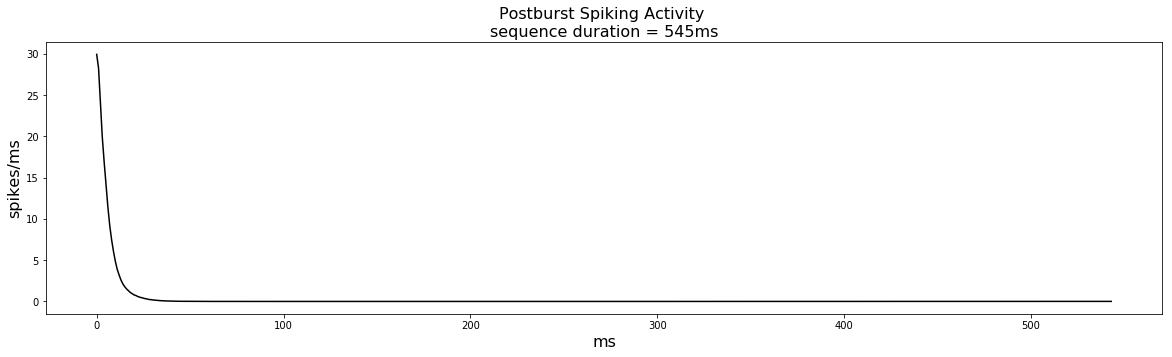

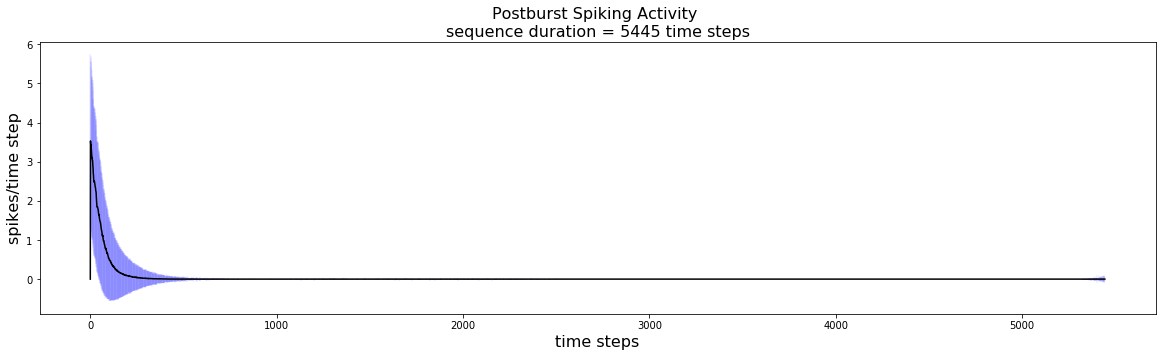

In [5]:
# extract postburst sequences, duration = min_ibi
post_burst_min = extract_sequence(spike_count, num_bursts, burst_end_mask, min_ibi, 0)
plot_sequence(post_burst_min, 0, (20, 5), binned=True)
plot_sequence(post_burst_min, 0, (20, 5), with_std=True)

100%|██████████| 600000000/600000000 [02:21<00:00, 4242228.59it/s]


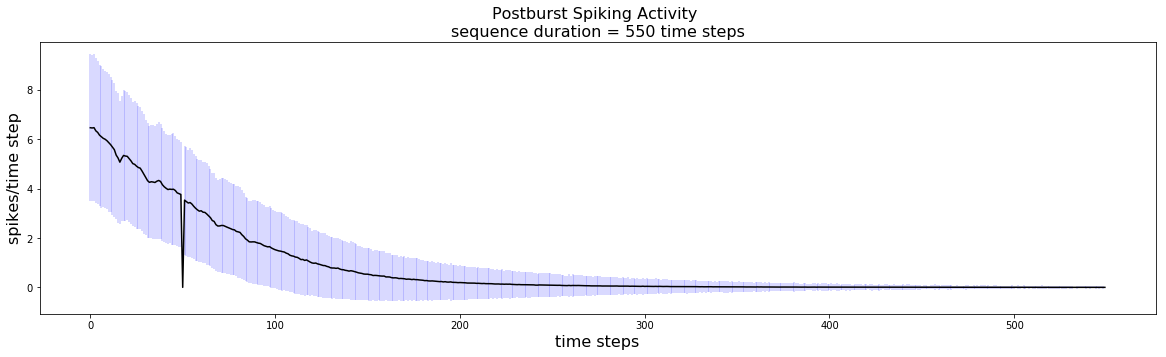

In [6]:
post_burst_500 = extract_sequence(spike_count, num_bursts, burst_end_mask, 500, 0, into_burst=50)
plot_sequence(post_burst_500, 0, (20, 5), elw=0.3, with_std=True)

100%|██████████| 600000000/600000000 [02:22<00:00, 4211852.11it/s]


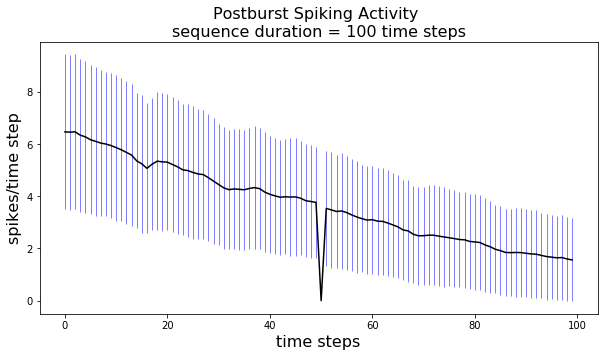

In [7]:
post_burst_50 = extract_sequence(spike_count, num_bursts, burst_end_mask, 50, 0, into_burst=50)
plot_sequence(post_burst_50, 0, (10, 5), elw=0.5, with_std=True)

In [8]:
bursts = bursts[bursts['IBI'] > 10000]
burst_end_mask = np.in1d(spike_count[0], bursts['EndT'].values)
num_bursts = bursts['EndT'].values.shape[0]
print('Number of bursts with IBI > 10000: ' + str(num_bursts))

Number of bursts with IBI > 10000: 9451


100%|██████████| 600000000/600000000 [02:19<00:00, 4292044.08it/s]


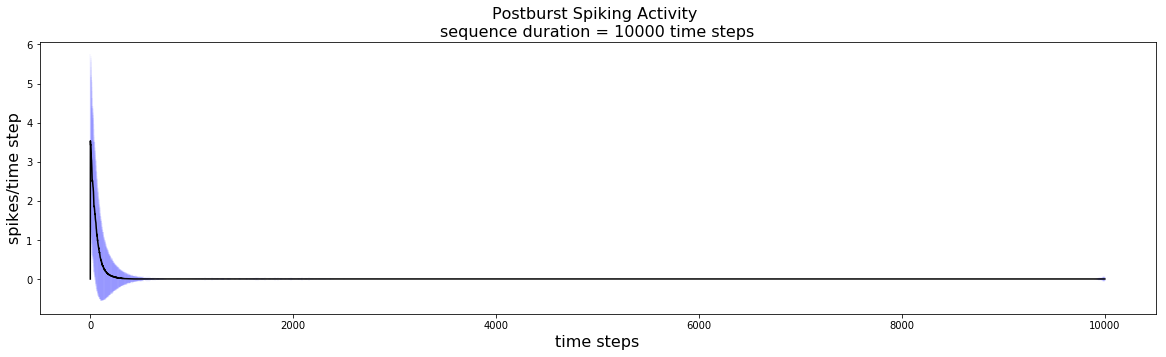

In [9]:
post_burst_10k = extract_sequence(spike_count, num_bursts, burst_end_mask, 10000, 0)
plot_sequence(post_burst_10k, 0, (20, 5), elw=0.05, with_std=True)

In [10]:
bursts = bursts[bursts['IBI'] > 70000]
burst_end_mask = np.in1d(spike_count[0], bursts['EndT'].values)
num_bursts = bursts['EndT'].values.shape[0]
print('Number of bursts with IBI > 70000: ' + str(num_bursts))

Number of bursts with IBI > 70000: 1956


100%|██████████| 600000000/600000000 [02:23<00:00, 4171738.57it/s]


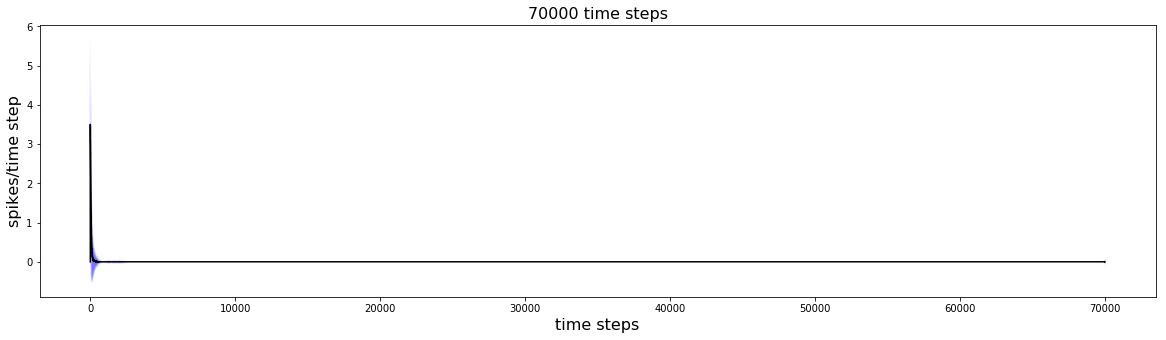

In [11]:
post_burst_70k = extract_sequence(spike_count, num_bursts, burst_end_mask, 70000, 0)
plot_sequence(post_burst_70k, 70000, (20, 5), elw=0.01, with_std=True)

In [12]:
bursts = bursts[bursts['IBI'] > 150000]
burst_end_mask = np.in1d(spike_count[0], bursts['EndT'].values)
num_bursts = bursts['EndT'].values.shape[0]
print('Number of bursts with IBI > 150000: ' + str(num_bursts))

Number of bursts with IBI > 150000: 171


100%|██████████| 600000000/600000000 [02:23<00:00, 4175193.07it/s]


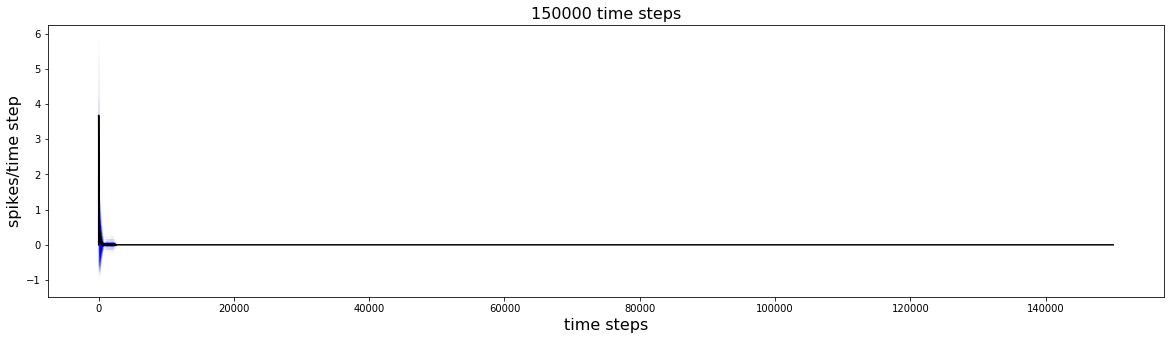

In [13]:
post_burst_150k = extract_sequence(spike_count, num_bursts, burst_end_mask, 150000, 0)
plot_sequence(post_burst_150k, 150000, (20, 5), elw=0.01, with_std=True)